In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
a = list(housing)
a

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [5]:
housing.info()
# here, we can see that "total_bedrooms" has some null values
# and all the attributes are of float type except "ocean_proximity", which is of 'object' type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()
# this shows that this is a categorical feature

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


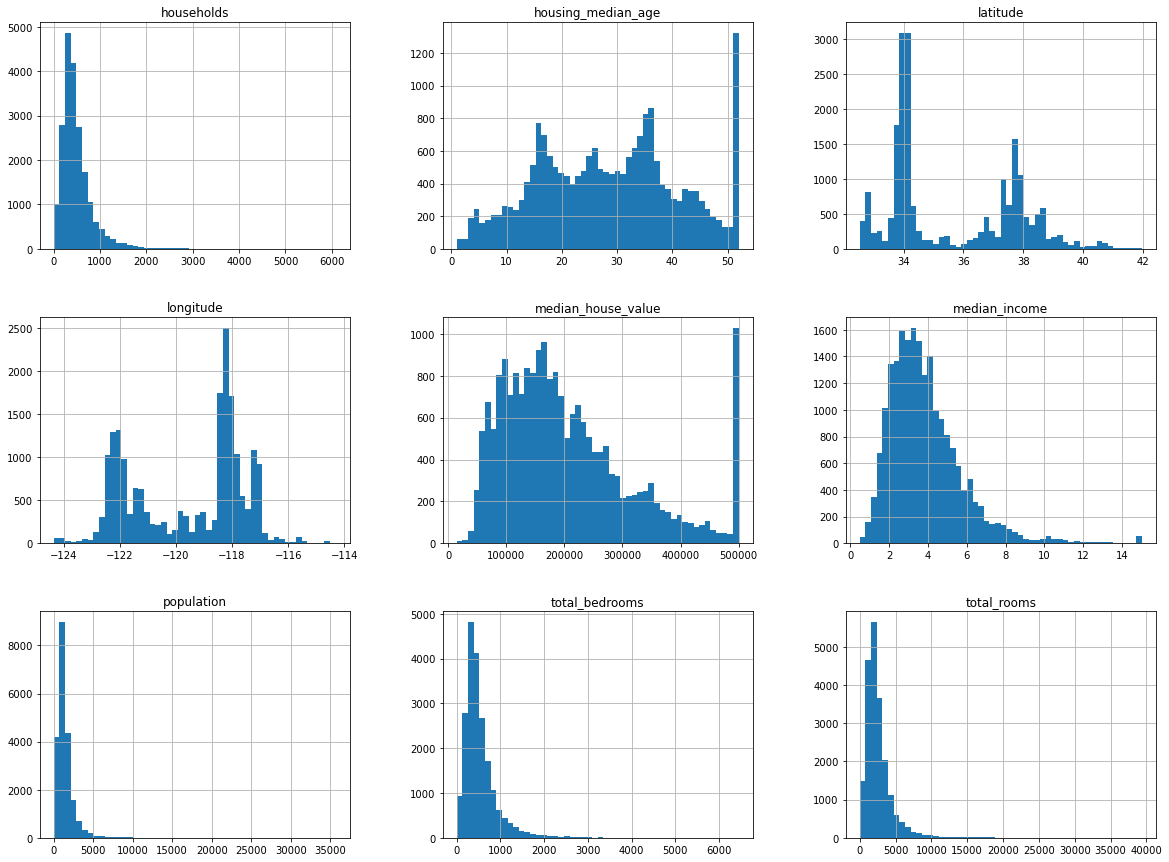

In [8]:
housing.hist(bins = 50, figsize = (20, 15));
# we here observe that 'housing_median_age', 'median_income' and 'median_housing_value' are capped, which may or may not be a problem
# as 'median_housing_value' is our target attributed, being capped may cause a serious problem
# these attributes have very different scaling, we will deal with this while doing feature scaling
# finally, many of these attributes are tail-heavy, they extend much farther to the right of the median than to left
# we will later try transforming these attributes to have more bell-shaped distributions

### Create a Test Set

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42, shuffle = True)

In [10]:
# lets create a copy so that we can work with our data without harming the original data
data = train_set.copy()

In [11]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


### Visualising Geographical Data

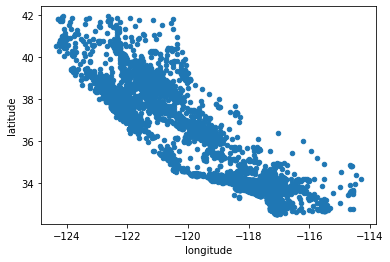

In [13]:
data.plot(kind = 'scatter', x = 'longitude', y = 'latitude');
# this plot looks much like the map of california

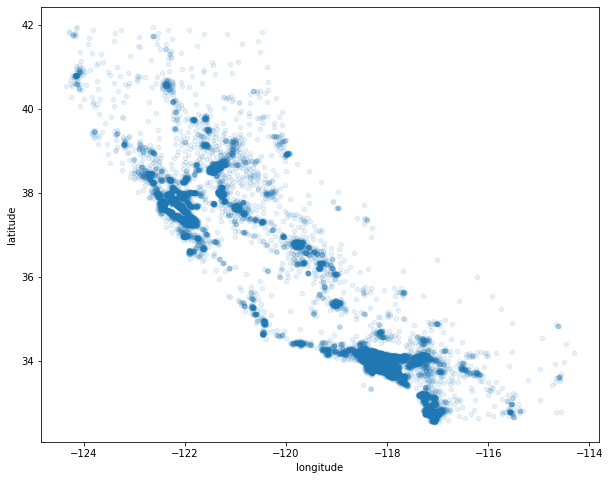

In [14]:
data.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1, figsize = (10, 8));
# using alpha it shows us the areas with high density

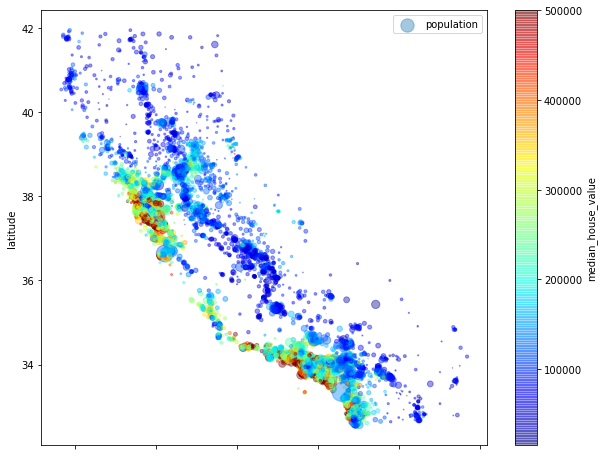

In [15]:
# now let us look at housing prices
# the radius of each circle represents the district's population (option s)
# the colour represents the price (option c)
data.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
         s = data['population']/100, label = 'population',
         c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,
          figsize = (10, 8)
         )
plt.legend()

#### This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

### Looking for Correlations

In [16]:
corr_matrix = np.round(data.corr(), 2)

In [17]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.10,0.04,0.06,0.09,0.05,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.03,-0.06,-0.10,-0.06,-0.08,-0.14
housing_median_age,-0.10,0.01,1.00,-0.36,-0.32,-0.29,-0.30,-0.12,0.10
total_rooms,0.04,-0.03,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.06,-0.06,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.09,-0.10,-0.29,0.86,0.88,1.00,0.91,0.00,-0.03
households,0.05,-0.06,-0.30,0.92,0.98,0.91,1.00,0.01,0.06
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.10,0.13,0.05,-0.03,0.06,0.69,1.00


In [18]:
# let's see how much each attribute correlates with median_house_value
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.00
median_income         0.69
total_rooms           0.13
housing_median_age    0.10
households            0.06
total_bedrooms        0.05
population           -0.03
longitude            -0.05
latitude             -0.14
Name: median_house_value, dtype: float64

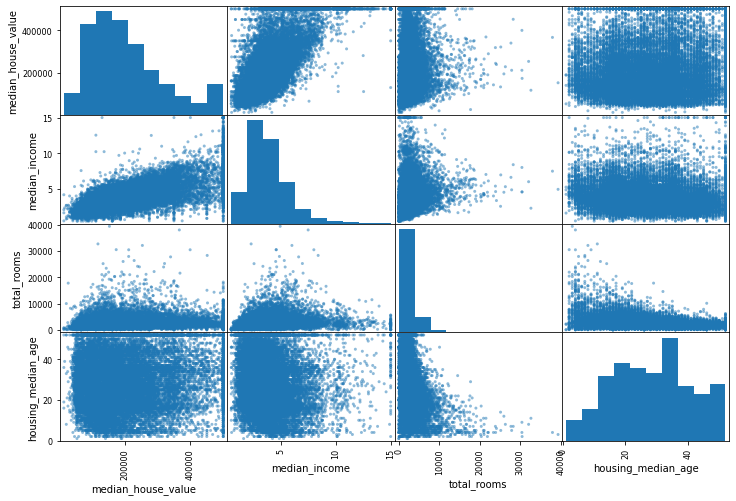

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,8));

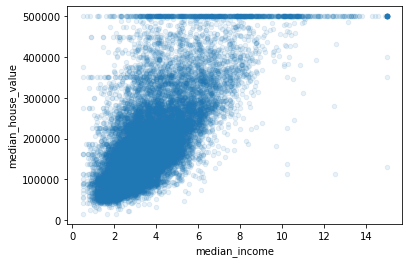

In [20]:
data.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

#### This plot reveals a few things. First, the correlation is indeed very strong. we can clearly see the upward trend and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines: horizontal line around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that. We may want to try removing the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

### Data Cleaning

In [21]:
# now, we will get rid of the null values in our dataset
# we have 3 ways to do so:
# Get rid of corresponding districts
# Get rid of whole Attribute
# Fill in the values with (zero, mean, median, mode, etc.)

# housing.dropna(subset = ['total bedrooms'])     Option 1
# housing.drop('total_bedrooms', axis = 1)        Option 2
# median = housing['total_bedrooms'].median[]
# housing['total_bedrooms'].fillna(median)        Option 3

In [22]:
# Or we can also use sklearn Imputer class for filling the missing values
from sklearn.impute import SimpleImputer

### Handling Text and Categorical Attributes

In [23]:
# For encodeing our Categorical Features we will use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

### Feature Scaling

In [24]:
# As we can see that there is huge dofference betweenth scales of various attributes like "total_rooms" and "median_income"
# Machine Learning Algorithms face difficulty when there are differnet scales for different attributes
# So, we perform feature Scaling to remove this problem
# there are two main ways to do so: Min_Max Scaling (or normalization) and Standardization
# Min_Max Scaling is done by subtracting the min and dividing by (max-min)
# Values of Min_Max_Scaling are in the range of 0-1
# Scikit_Learn provides a transformer called MinMaxScaler for this
# For Standardization, firstly the mean is subtracted, then divided by Variance
# Standarization doesn't have any bound values to a specific range
# Standarization can create problems in some algorithms like Neural Networks which expects the values between 0 and 1
# However, Standarization is much less affected by Outliers
# scikit_learn provides a transformer called StandardScaler for Standarization

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
StandardScaler

sklearn.preprocessing._data.StandardScaler

### Column Transfromer

In [27]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [28]:
from sklearn.compose import make_column_transformer

imp = make_column_transformer(
    (SimpleImputer(strategy='median'), [0, 1, 2, 3, 4, 5, 6, 7]),
    remainder = 'passthrough'
    )

In [29]:
data = pd.DataFrame(imp.fit_transform(data))

In [30]:
data

,0,1,2,3,4,5,6,7,8,9
0,-117.03,32.71,33,3126,627,2300,623,3.2596,103000,NEAR OCEAN
1,-118.16,33.77,49,3382,787,1314,756,3.8125,382100,NEAR OCEAN
2,-120.48,34.66,4,1897,331,915,336,4.1563,172600,NEAR OCEAN
3,-117.11,32.69,36,1421,367,1418,355,1.9425,93400,NEAR OCEAN
4,-119.8,36.78,43,2382,431,874,380,3.5542,96500,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-117.96,33.78,35,1330,201,658,217,6.37,229200,<1H OCEAN
16508,-117.43,34.02,33,3084,570,1753,449,3.05,97800,INLAND
16509,-118.38,34.03,36,2101,569,1756,527,2.9344,222100,<1H OCEAN
16510,-121.96,37.58,15,3575,597,1777,559,5.7192,283500,<1H OCEAN


In [31]:
from sklearn.compose import make_column_transformer

columnTransformer = make_column_transformer(
    (OneHotEncoder(), [9]),
    (StandardScaler(), [0, 1, 2, 3, 4, 5, 6, 7]),
    remainder = 'passthrough'
    )

In [32]:
data = pd.DataFrame(columnTransformer.fit_transform(data))

In [33]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,1.27259,-1.37281,0.34849,0.222569,0.211228,0.768276,0.322906,-0.326196,103000
1,0,0,0,0,1,0.709162,-0.876696,1.61812,0.340293,0.593094,-0.0989013,0.672027,-0.0358434,382100
2,0,0,0,0,1,-0.447603,-0.460146,-1.95271,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,172600
3,0,0,0,0,1,1.2327,-1.38217,0.586545,-0.56149,-0.409306,-0.00743434,-0.380587,-1.01786,93400
4,0,1,0,0,0,-0.108551,0.532084,1.14201,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,96500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1,0,0,0,0,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.30721,229200
16508,0,1,0,0,0,1.07314,-0.759688,0.34849,0.203255,0.0751875,0.287195,-0.133839,-0.436266,97800
16509,1,0,0,0,0,0.599469,-0.755007,0.586545,-0.248786,0.0728009,0.289833,0.0709086,-0.496973,222100
16510,1,0,0,0,0,-1.18554,0.90651,-1.07984,0.429046,0.139628,0.308303,0.154908,0.96545,283500


### Building a algorithm

In [34]:
y_train = data.iloc[:, 13].copy()
y_train

0        103000
1        382100
2        172600
3         93400
4         96500
          ...  
16507    229200
16508     97800
16509    222100
16510    283500
16511    325000
Name: 13, Length: 16512, dtype: object

In [35]:
data.drop(columns=13, inplace=True)

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
r = regressor.fit(data, y_train)

### Creating Pipeline

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
pipeline1 = Pipeline(steps=[('a', imp),
                            ('b', columnTransformer)])

In [83]:
pipeline2 = Pipeline(steps = [('c', r)])

### Preparing Test Data

In [84]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [85]:
test_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [86]:
test = pd.DataFrame(pipeline1.fit_transform(test_set))

In [87]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,0,0,0,0.255417,0.221941,-0.30074,-0.500566,-0.24197,-0.0265482,-0.35786,-1.14238,47700
1,0,1,0,0,0,0.0297661,-0.209477,0.098724,0.15038,-0.24197,0.128764,0.22245,-0.690505,45800
2,0,0,0,1,0,-1.46455,1.03788,1.85636,0.551903,-0.24197,-0.100164,1.19995,-0.186169,500001
3,1,0,0,0,0,0.400837,-0.612759,-0.939881,0.199269,-0.24197,0.25445,-0.00709456,1.01381,218600
4,0,0,0,0,1,-1.20881,0.484544,0.418295,-0.117603,-0.24197,-0.32191,-0.179898,-0.0559925,278000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1,0,0,0,0,1.15301,-1.04418,-1.01977,0.250874,-0.113687,-0.0633562,-0.117998,0.411772,263300
4124,0,0,0,0,1,-0.657216,-0.106312,-0.0610614,0.775071,0.84606,0.205073,0.534528,-0.586693,266800
4125,1,0,0,0,0,-1.26898,0.808107,-0.30074,0.679104,0.0193473,0.146719,0.181184,2.87009,500001
4126,0,1,0,0,0,-0.120668,0.554884,0.57808,-0.046986,-0.151697,-0.174678,-0.0612569,-0.55565,72300


In [88]:
test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [89]:
test.drop(columns=13, inplace=True)

In [90]:
test_pred = pd.DataFrame(pipeline2.predict(test))
test_pred

,0
0,49075.00
1,72846.00
2,356725.11
3,253039.00
4,267471.00
...,...
4123,214217.00
4124,238496.00
4125,500001.00
4126,82841.00


In [94]:
from sklearn.metrics import r2_score

In [97]:
r2_score(test_set['median_house_value'], test_pred)

0.7164739185880498

In [98]:
r2_score(y_train, r.predict(data))

0.9754821679823639